<a href="https://colab.research.google.com/github/Gr1Lo/trsgi_nets/blob/main/load_from_gh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Чтение репозитория с github

In [ ]:
!rm -r trsgi_nets
!git clone https://github.com/Gr1Lo/trsgi_nets.git

Чтение данных из *.pickle. Если их нет, сохранение в *.pickle из исходных файлов

In [ ]:
%cd trsgi_nets/
%load_ext google.colab.data_table
!pip install pyEOF
!pip install kneed

from clustering import *
from models import *
from read_data import *
from train_test_preparing import *
from utils import *

import os

%cd ..
if os.path.isfile('drive/MyDrive/trsgi_values.pickle'):
    trsgi_values = read_pickle('drive/MyDrive/trsgi_values.pickle')
else:
    trsgi_values = r_execel('drive/MyDrive/breitenmoser2014.xlsx')
    save_pickle('drive/MyDrive/trsgi_values.pickle', trsgi_values)


if os.path.isfile('drive/MyDrive/test.pickle'):
    df_data = read_pickle('drive/MyDrive/test.pickle')
    ds_n = read_pickle('drive/MyDrive/ds_n.pickle')
else:
    df_data, ds_n = r_netCDF('drive/MyDrive/test.nc')
    save_pickle('drive/MyDrive/test.pickle', df_data)
    save_pickle('drive/MyDrive/ds_n.pickle', ds_n) 

# Формирование тренировочных наборов данных

In [ ]:
pca, eofs, pcs, evfs = eof_an(df_data, ds_n, n = 10)
k_means_val = k_means(pcs, 10, '10 классов для нормализованных значений компонент', use_norm=True)

#наборы для классификации
list_class = []
post_list_class = []
a = list(range(0,6))
a[5] = None

for t_use_norm in (True, False):
    for a_m in a:
      postf = 'class_norm' + str(t_use_norm) + '_augFalse'  + '_use5' + str(a_m)
      var_n = 'tr_t' + postf + ', tr_l' + postf + ', te_t' + postf + ', te_l' + postf + ', v_r' + postf
      #print(var_n)
      exec(var_n + ' = sta_split(trsgi_values, k_means_val, use_norm = ' + str(t_use_norm) + ", type_op = 'class', use_aug = False, use5 = " + str(a_m) + ')')
      exec('list_class.append([' + var_n + '])')
      post_list_class.append(postf)

#наборы для регрессиии
list_regr = []
post_list_regr = []
for t_use_norm in (True, False):
  for t_use_aug in (True, False):
    for a_m in a:
      postf = 'regr_norm' + str(t_use_norm) + '_aug' + str(t_use_aug)  + '_use5' + str(a_m)
      var_n = 'tr_t' + postf + ', tr_l' + postf + ', te_t' + postf + ', te_l' + postf + ', v_r' + postf
      #print(var_n)
      exec(var_n + ' = sta_split(trsgi_values, pcs, use_norm = ' + str(t_use_norm) + ", type_op = 'regr', use_aug = " + str(t_use_aug) + ', use5 = ' + str(a_m) + ')')
      exec('list_regr.append([' + var_n + '])')
      post_list_regr.append(postf)

# Запуск обучения моделей

**Нотация моделей:** <br>
*regr* - регрессионная  <br>
class - классификационная <br>
*normTrue/normFalse* - нормированные или ненормированные данные<br>
*augTrue/augFalse* - синтетически расширенный набор данных или нет<br>
*use5<число>* - использовалось ли разделение оп пятилеткам плюс число смещения отсчета (*use5None* - не использовалось)<br>
eof0 - eof не использовались<br>
eof1 - использовались eof<br>
eof2 - использовались примитивы eof<br>

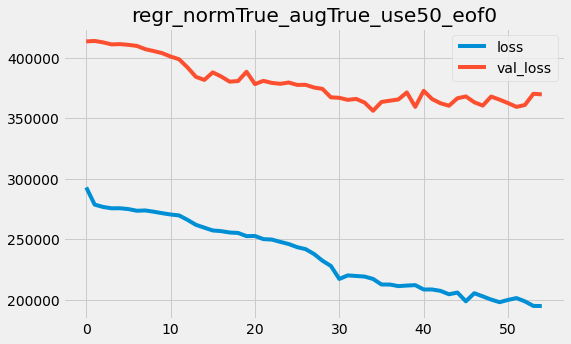

1/1 - 0s - loss: 358452.4062
358452.40625


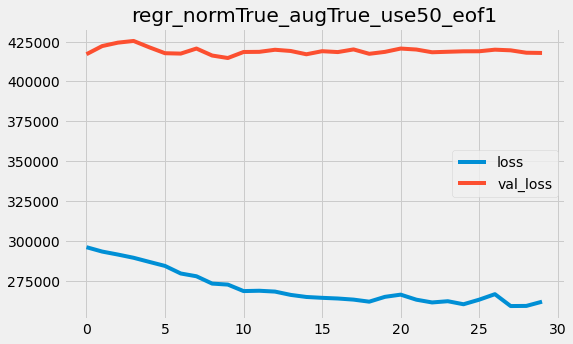

1/1 - 0s - loss: 370022.5625
370022.5625


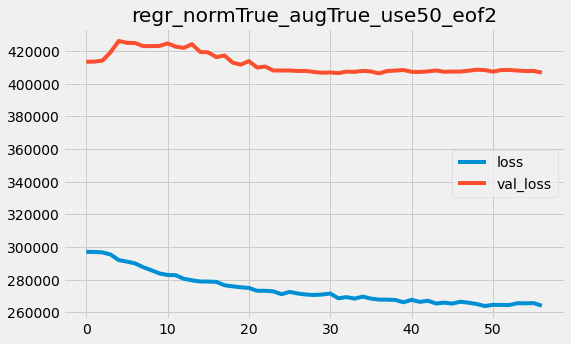

1/1 - 0s - loss: 386825.3125
386825.3125


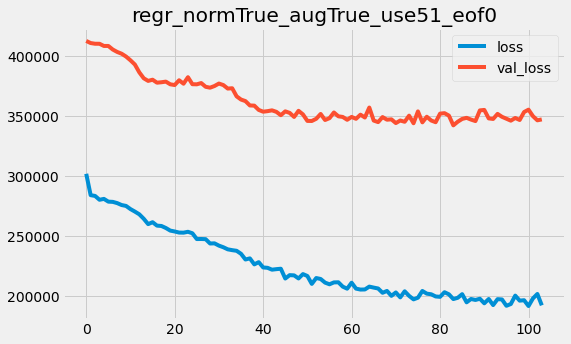

1/1 - 0s - loss: 367169.9375
367169.9375


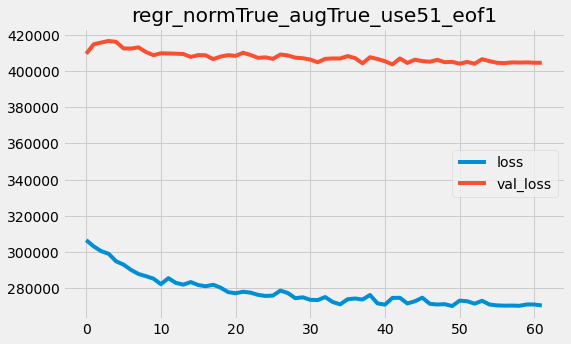

1/1 - 0s - loss: 369536.1562
369536.15625


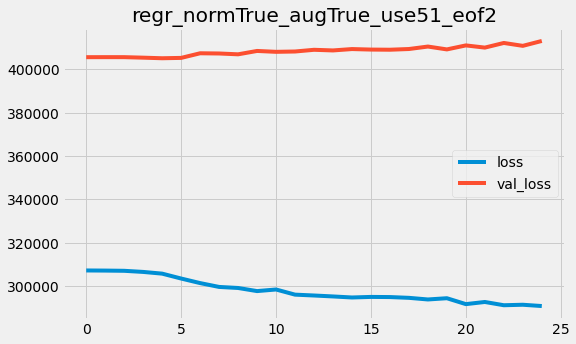

1/1 - 0s - loss: 370849.0625
370849.0625


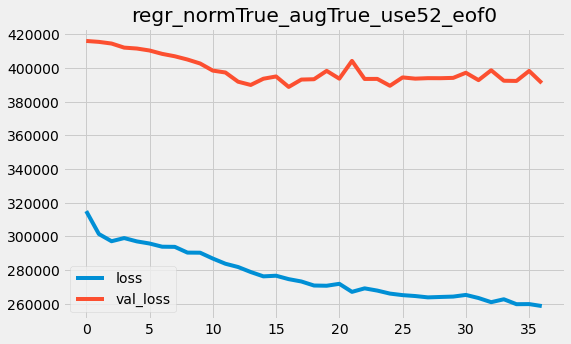

1/1 - 0s - loss: 343679.4688
343679.46875


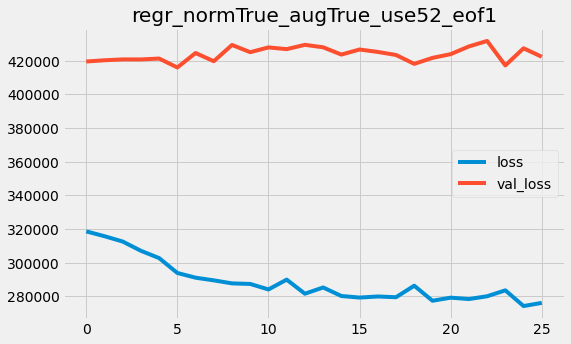

1/1 - 0s - loss: 334736.8125
334736.8125


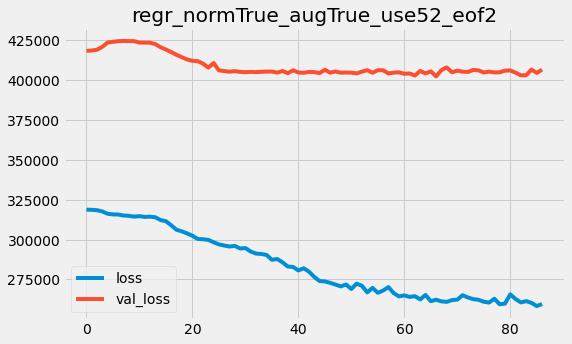

1/1 - 0s - loss: 335240.0000
335240.0


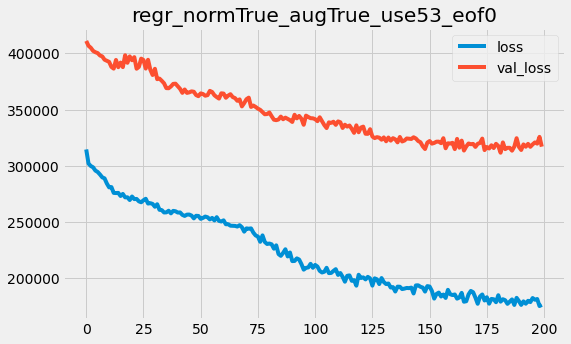

1/1 - 0s - loss: 306948.6562
306948.65625


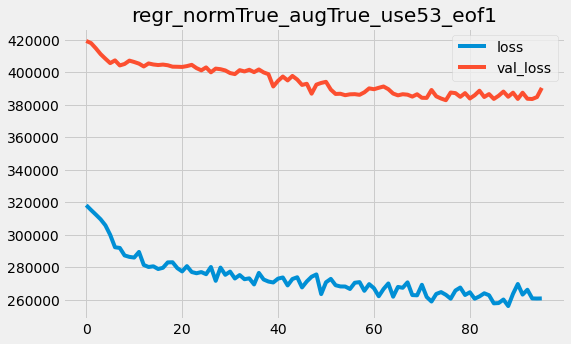

1/1 - 0s - loss: 338486.5312
338486.53125


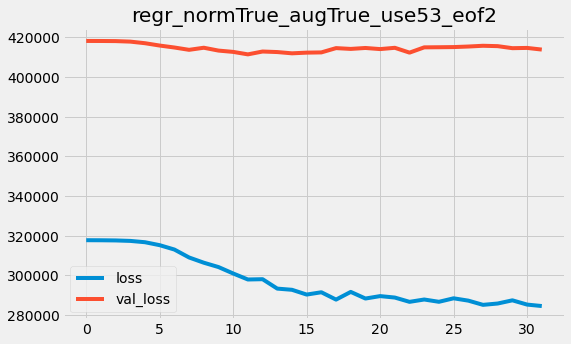

1/1 - 0s - loss: 337351.8438
337351.84375


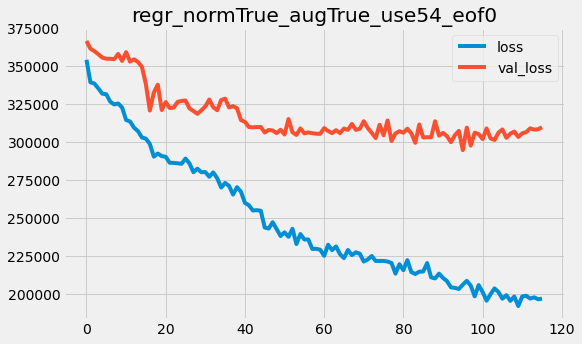

1/1 - 0s - loss: 304749.1250
304749.125


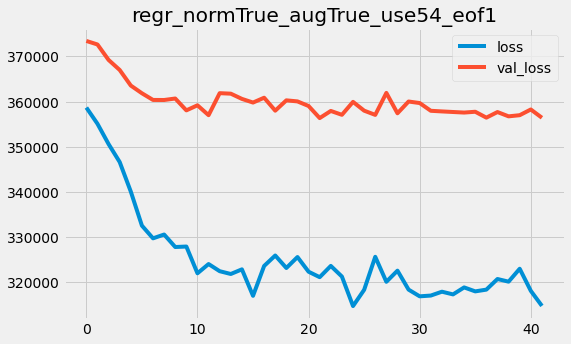

1/1 - 0s - loss: 299599.8438
299599.84375


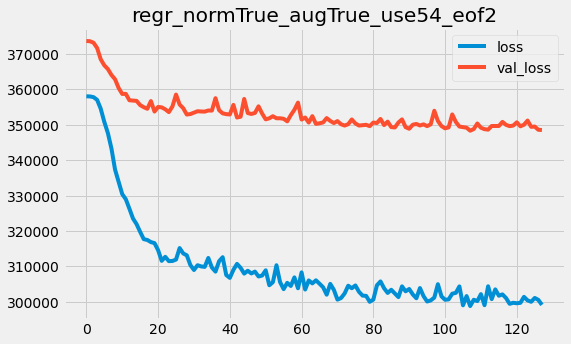

1/1 - 0s - loss: 298820.8750
298820.875


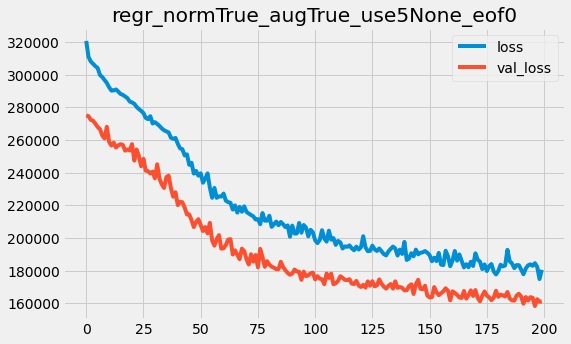

1/1 - 0s - loss: 361329.2500
361329.25


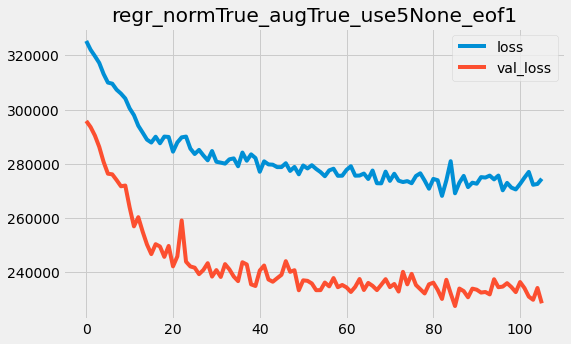

1/1 - 0s - loss: 438999.0000
438999.0


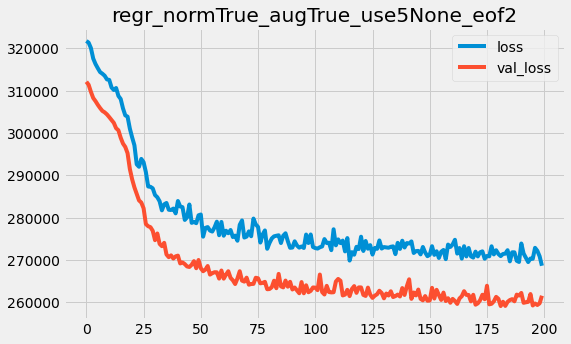

1/1 - 0s - loss: 444412.5625
444412.5625


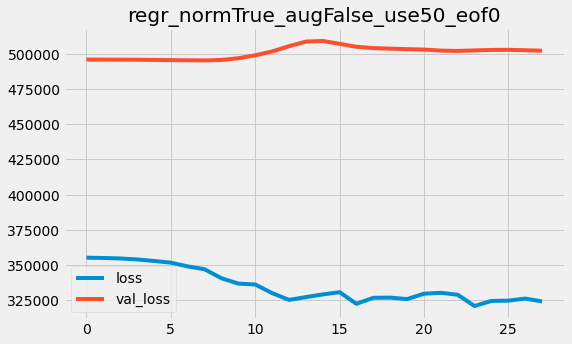

1/1 - 0s - loss: 381050.9062
381050.90625


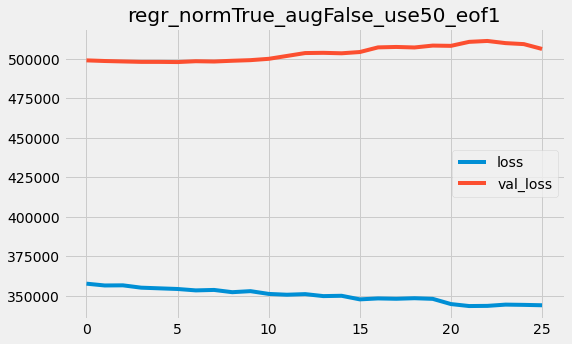

1/1 - 0s - loss: 389969.9688
389969.96875


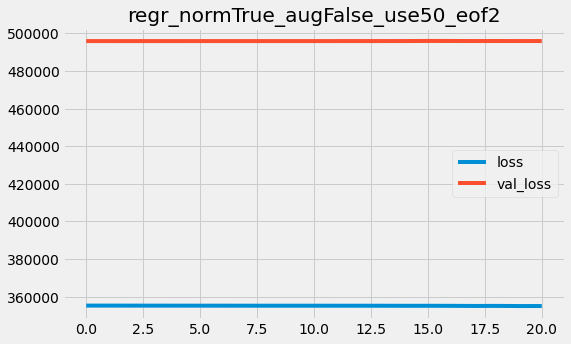

1/1 - 0s - loss: 393525.4062
393525.40625


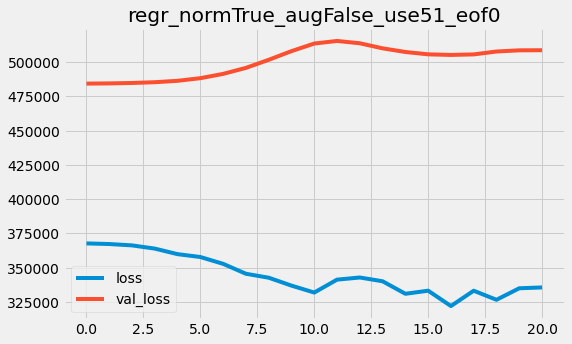

1/1 - 0s - loss: 373081.2812
373081.28125


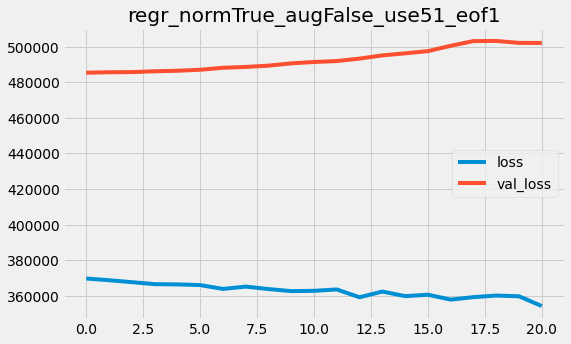

1/1 - 0s - loss: 373223.4375
373223.4375


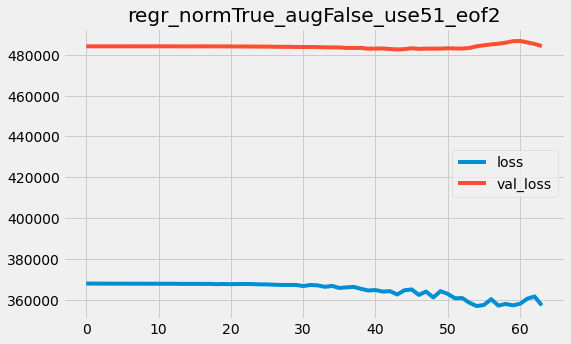

1/1 - 0s - loss: 372744.3125
372744.3125


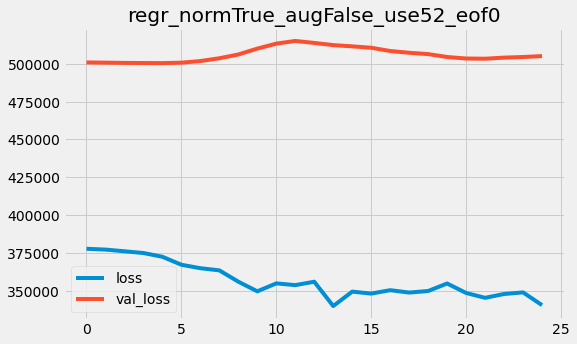

1/1 - 0s - loss: 333776.5312
333776.53125


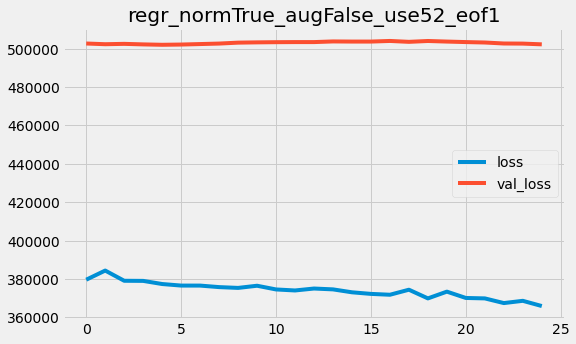

1/1 - 0s - loss: 340567.0000
340567.0


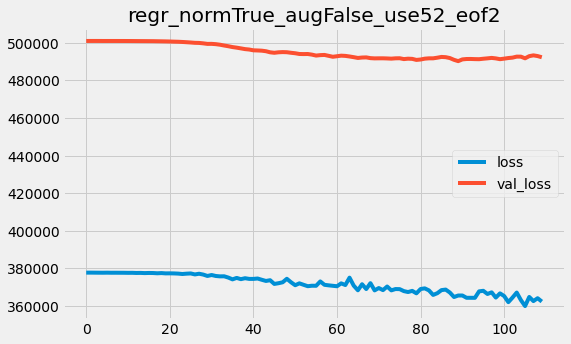

1/1 - 0s - loss: 339928.2188
339928.21875


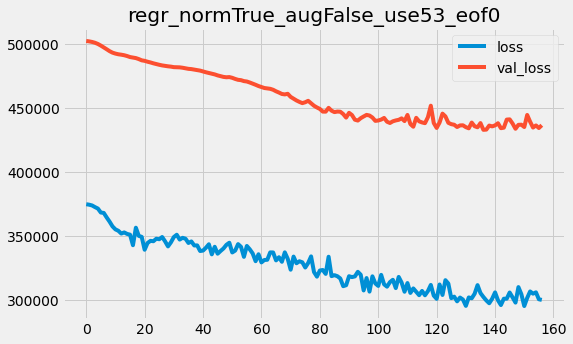

1/1 - 0s - loss: 338361.5938
338361.59375


In [ ]:
pd.set_option('max_colwidth', 100)
d = {'Name': [], 'params': [], 'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': [], 'test_loss': [], 'test_accuracy': []}
df_class = pd.DataFrame(data=d)

d = {'Name': [], 'params': [], 'loss': [], 'val_loss': [], 'test_loss': []}
df_regr = pd.DataFrame(data=d)

for li_m in range(len(list_regr)):
  m_stri = post_list_regr[li_m]
  for uE in list(range(3)):
    exec('df_regr, ' + m_stri + '_useEOF' + str(uE) + ' = train_model(eofs, df_regr, list_regr, post_list_regr, li_m, type_m = "regr", useEOF = ' + str(uE) + ')')


for li_m in range(len(list_class)):
  m_stri = post_list_class[li_m]
  for uE in list(range(3)):
    exec('df_class, ' + m_stri + '_useEOF' + str(uE) + ' = train_model(eofs, df_class, list_class, post_list_class, li_m, type_m = "class", useEOF = ' + str(uE) + ')')





Начал делать визуализацию

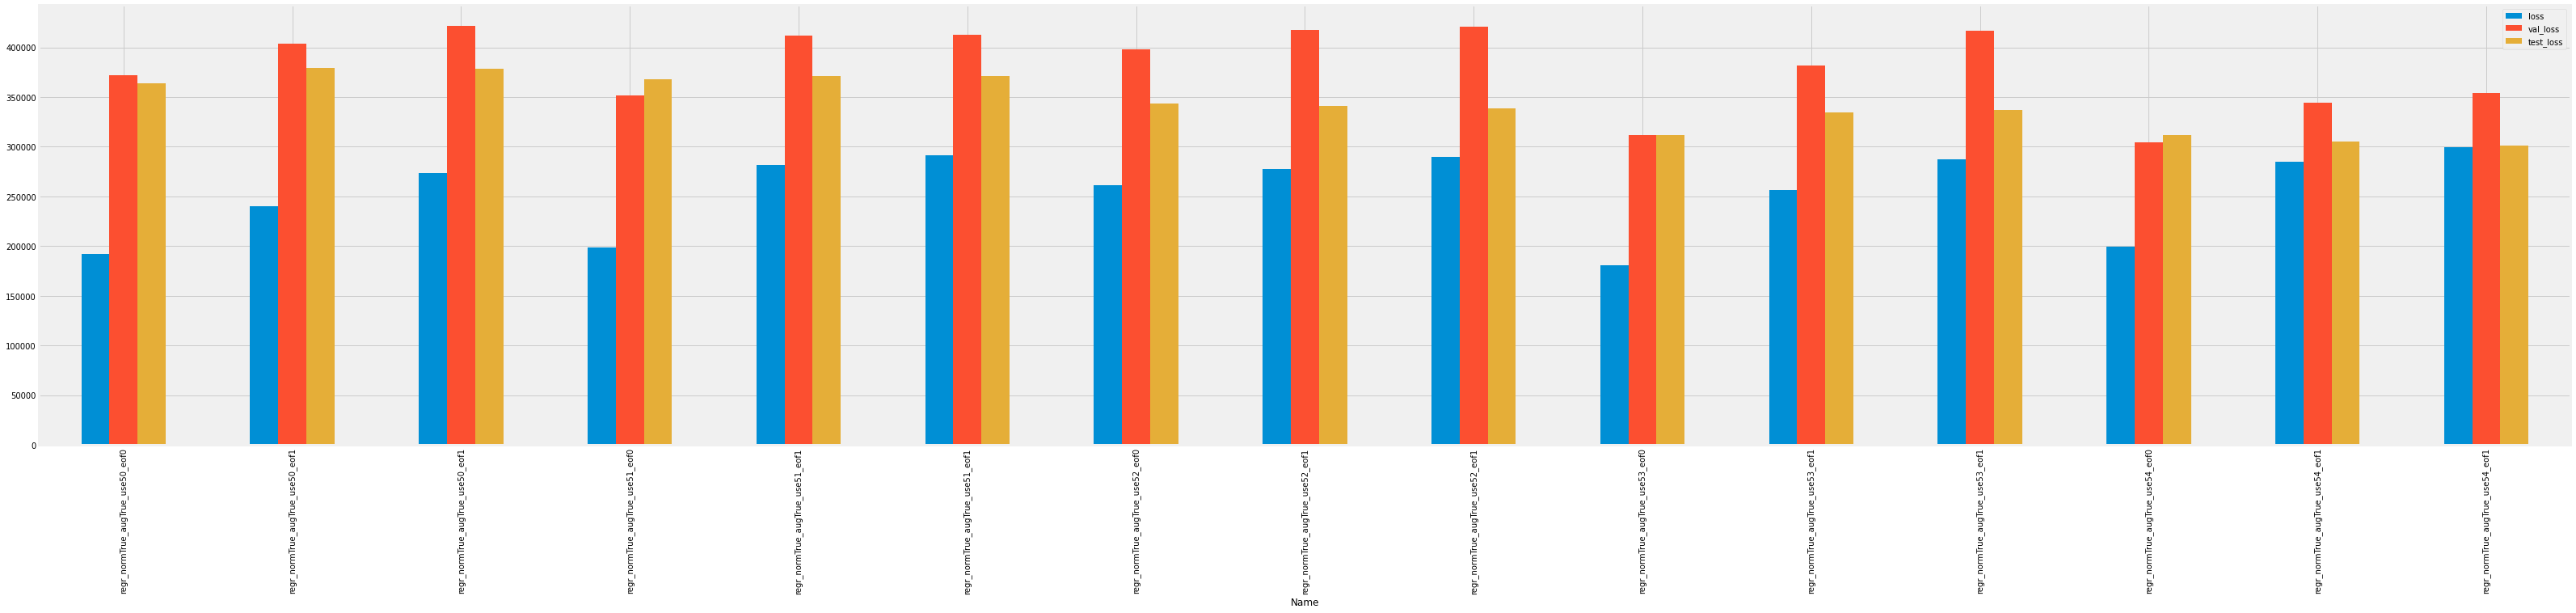

In [17]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [50, 10]
df_regr.plot.bar(x= 'Name')